## Taller calculadora de imagenes 
#### 1. Oeraciones aritmeticas 
#### 2. Operaciones geometricas 

In [36]:
import numpy as np
import math
import os
import cv2
from matplotlib import pyplot as plt

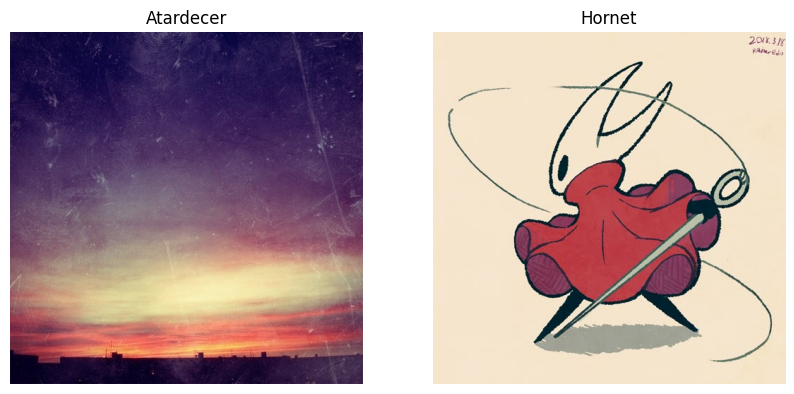

In [37]:
# cargar las imagenes 
atardecer = cv2.imread('./atardecer.jpeg')
hornet = cv2.imread('./hornet.jpeg')
atardecer = cv2.cvtColor(atardecer, cv2.COLOR_BGR2RGB)
hornet = cv2.cvtColor(hornet, cv2.COLOR_BGR2RGB)

# mostrar las imagenes
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(atardecer)
plt.title('Atardecer')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(hornet)
plt.title('Hornet')
plt.axis('off')
plt.show()

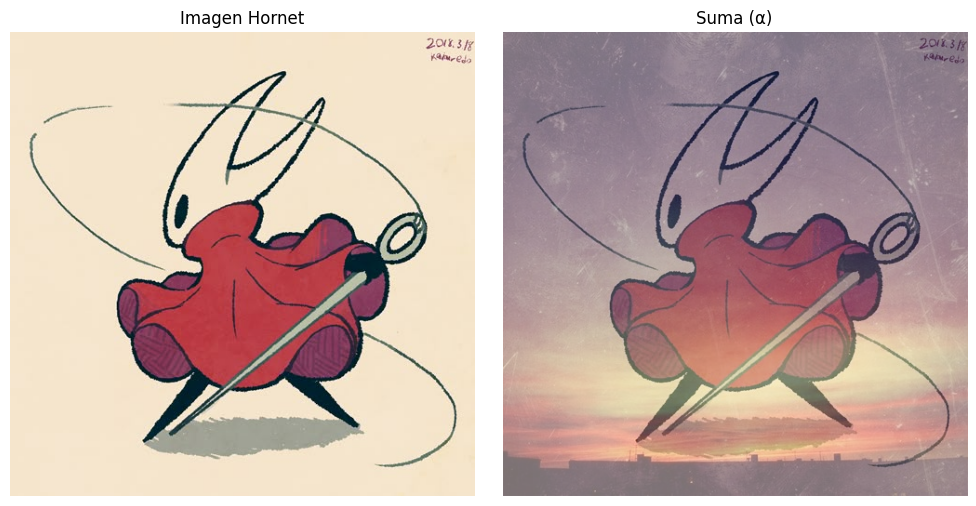

In [38]:
#sumar las dos imagenes 
def sumar_imagenes(A, B, alpha):
    filas, cols, canales = A.shape
    resultado = np.zeros_like(A, dtype=np.float32)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = alpha*A[i, j, k] + (1-alpha)*B[i, j, k]
    return np.clip(resultado, 0, 255).astype(np.uint8)

img_sumada = sumar_imagenes(hornet, atardecer, 0.5)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(hornet); axes[0].set_title("Imagen Hornet"); axes[0].axis("off")
axes[1].imshow(img_sumada); axes[1].set_title("Suma (α)"); axes[1].axis("off")
plt.tight_layout(); plt.show()


/tmp/ipykernel_14431/1394489178.py:10: RuntimeWarning: overflow encountered in scalar subtract
  resultado[i, j, k] = A[i, j, k] - B[i, j, k]


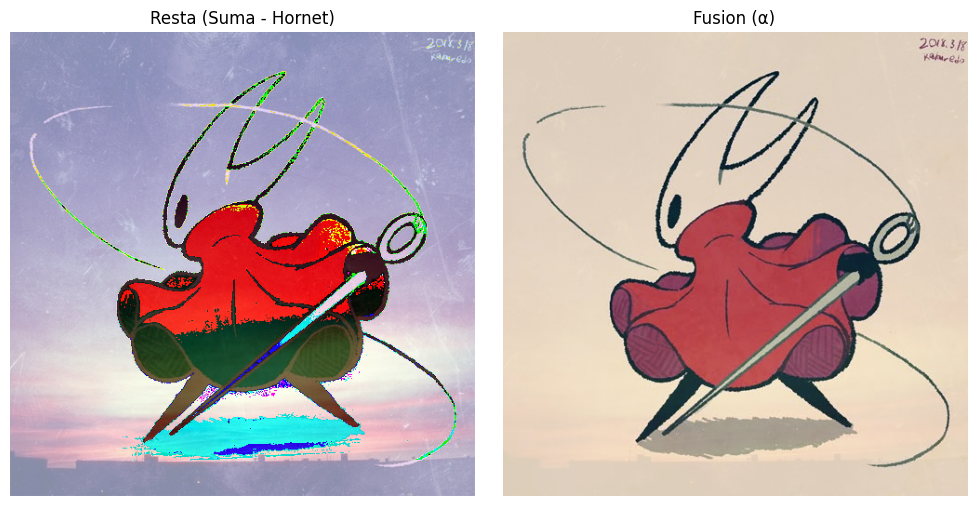

In [47]:
# restar la imagen img_sumada para obtener la imagen hornet
def restar_imagenes(A, B):
    filas, cols, canales = A.shape
    resultado = np.zeros_like(A, dtype=np.float32)
    resultado2 = np.zeros_like(A, dtype=np.float32)

    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = A[i, j, k] - B[i, j, k]
                resultado2[i, j, k] = 0.2*A[i, j, k] + (1-0.2)*B[i, j, k]

    return np.clip(resultado, 0, 255).astype(np.uint8), np.clip(resultado2, 0, 255).astype(np.uint8)

img_resta, img_fusionada = restar_imagenes(img_sumada, hornet)
#mostrar ambas imagenes
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(img_resta); axes[0].set_title("Resta (Suma - Hornet)"); axes[0].axis("off")
axes[1].imshow(img_fusionada); axes[1].set_title("Fusion (α)"); axes[1].axis("off")
plt.tight_layout(); plt.show()  




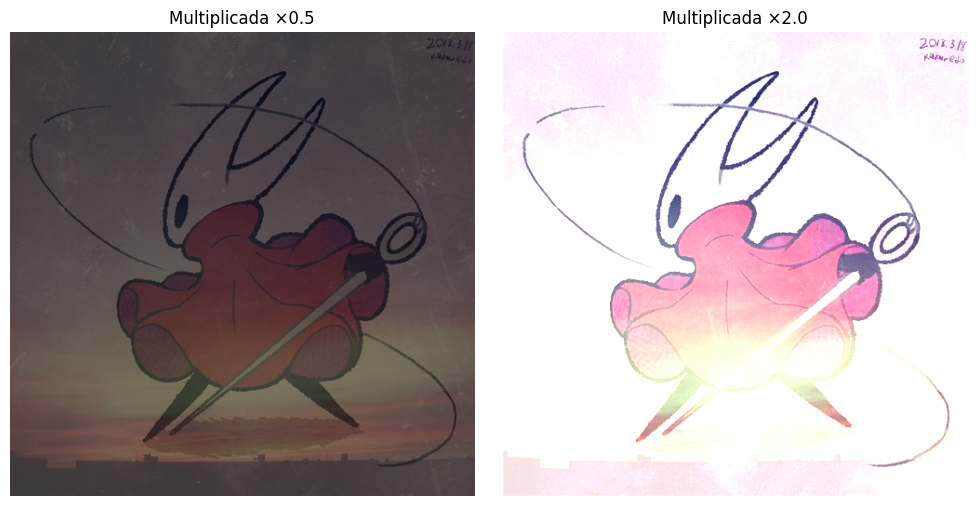

In [40]:
#multiplicar imagen 
def multiplicar_imagen(img, c):
    filas, cols, canales = img.shape
    A = img.astype(np.float32)
    resultado = np.zeros_like(A)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = c * A[i, j, k]
    return np.clip(resultado, 0, 255).astype(np.uint8)

# Ejemplo de uso
img_mul_05 = multiplicar_imagen(img_sumada, 0.5)
img_mul_2 = multiplicar_imagen(img_sumada, 2.0)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(img_mul_05); axes[0].set_title("Multiplicada ×0.5"); axes[0].axis("off")
axes[1].imshow(img_mul_2); axes[1].set_title("Multiplicada ×2.0"); axes[1].axis("off")
plt.tight_layout(); plt.show()


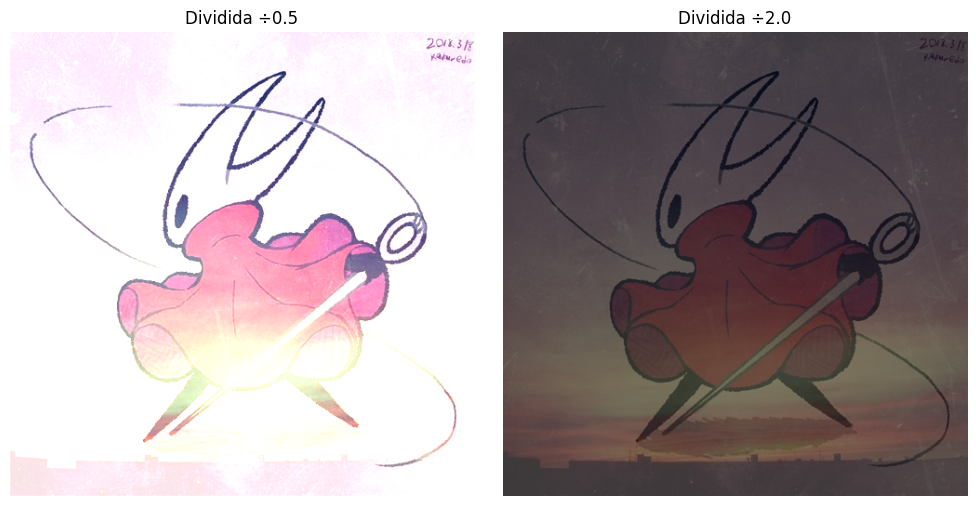

In [41]:
def dividir_imagen(img, c):
    filas, cols, canales = img.shape
    A = img.astype(np.float32)
    resultado = np.zeros_like(A)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = A[i, j, k] / c
    return np.clip(resultado, 0, 255).astype(np.uint8)

# Ejemplo de uso
img_div_05 = dividir_imagen(img_sumada, 0.5)
img_div_2 = dividir_imagen(img_sumada, 2.0)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(img_div_05); axes[0].set_title("Dividida ÷0.5"); axes[0].axis("off")
axes[1].imshow(img_div_2); axes[1].set_title("Dividida ÷2.0"); axes[1].axis("off")
plt.tight_layout(); plt.show()


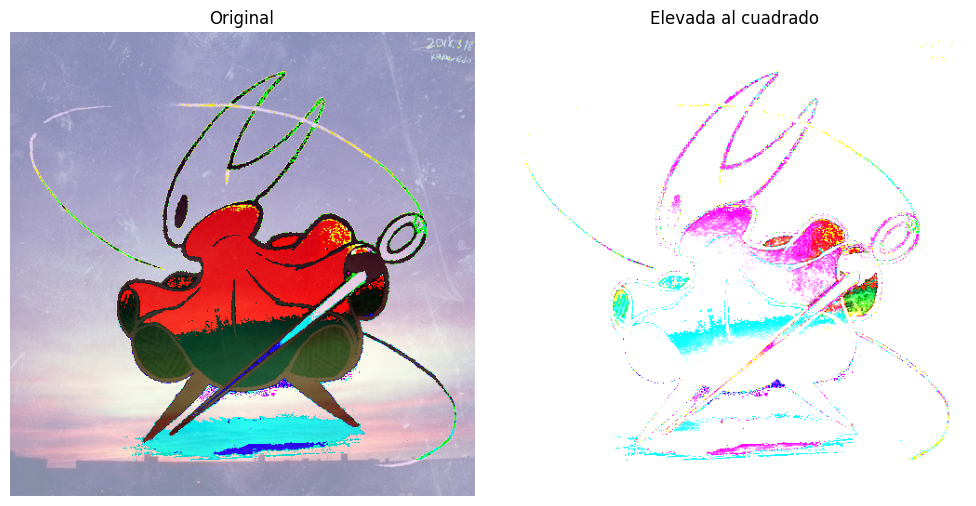

In [42]:
def cuadrado_imagen(img):
    filas, cols, canales = img.shape
    A = img.astype(np.float32)
    resultado = np.zeros_like(A)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = A[i, j, k] ** 2
    return np.clip(resultado, 0, 255).astype(np.uint8)

# Ejemplo de uso
img_cuadrada = cuadrado_imagen(img_resta)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(img_resta); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(img_cuadrada); axes[1].set_title("Elevada al cuadrado"); axes[1].axis("off")
plt.tight_layout(); plt.show()


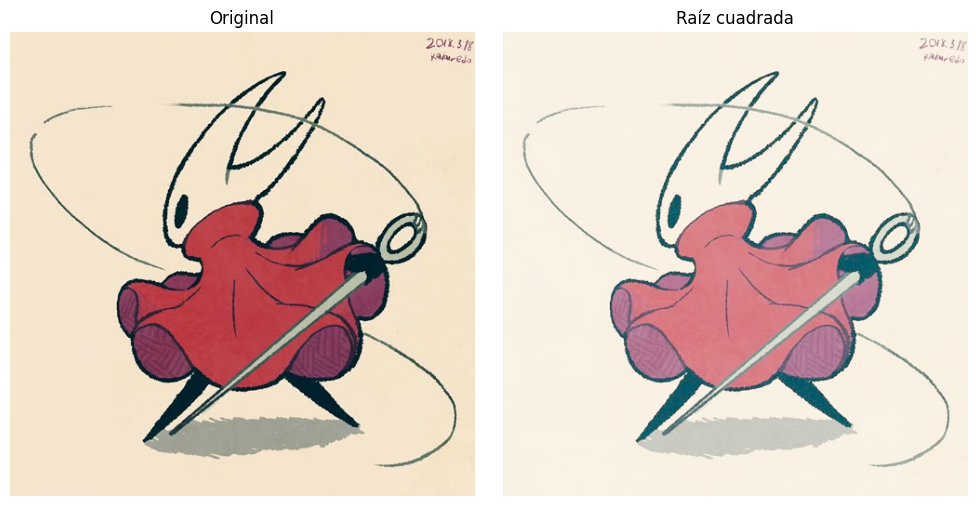

In [43]:
def raiz_cuadrada_imagen(img):
    filas, cols, canales = img.shape
    A = img.astype(np.float32)
    resultado = np.zeros_like(A)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = math.sqrt(A[i, j, k])
    resultado = resultado / resultado.max() * 255
    return resultado.astype(np.uint8)
# Ejemplo de uso
img_raiz = raiz_cuadrada_imagen(hornet)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(hornet); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(img_raiz); axes[1].set_title("Raíz cuadrada"); axes[1].axis("off")
plt.tight_layout(); plt.show()


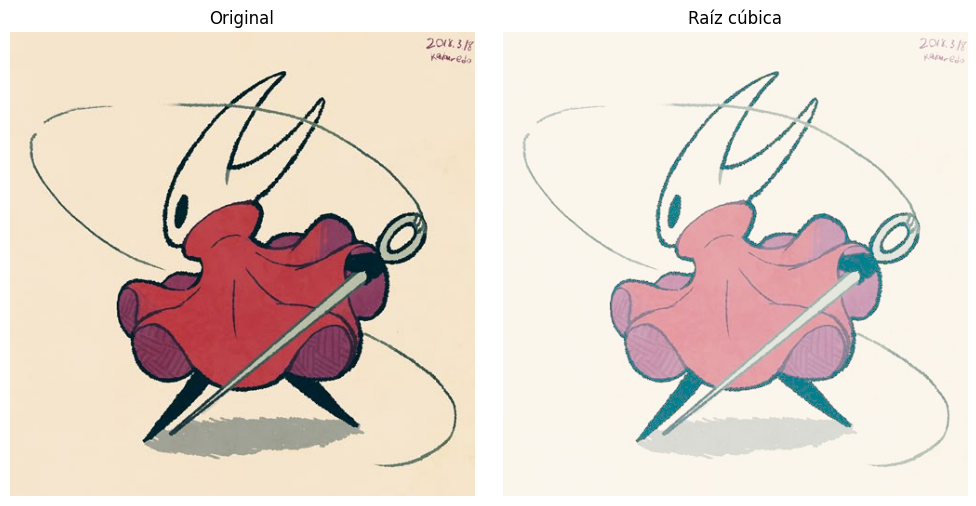

In [44]:
def raiz_cubica_imagen(img):
    filas, cols, canales = img.shape
    A = img.astype(np.float32)
    resultado = np.zeros_like(A)
    for i in range(filas):
        for j in range(cols):
            for k in range(canales):
                resultado[i, j, k] = A[i, j, k] ** (1/3)
    resultado = resultado / resultado.max() * 255
    return resultado.astype(np.uint8)
# Ejemplo de uso
img_raiz = raiz_cubica_imagen(hornet)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(hornet); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(img_raiz); axes[1].set_title("Raíz cúbica"); axes[1].axis("off")
plt.tight_layout(); plt.show()

### Rotacion geometrica

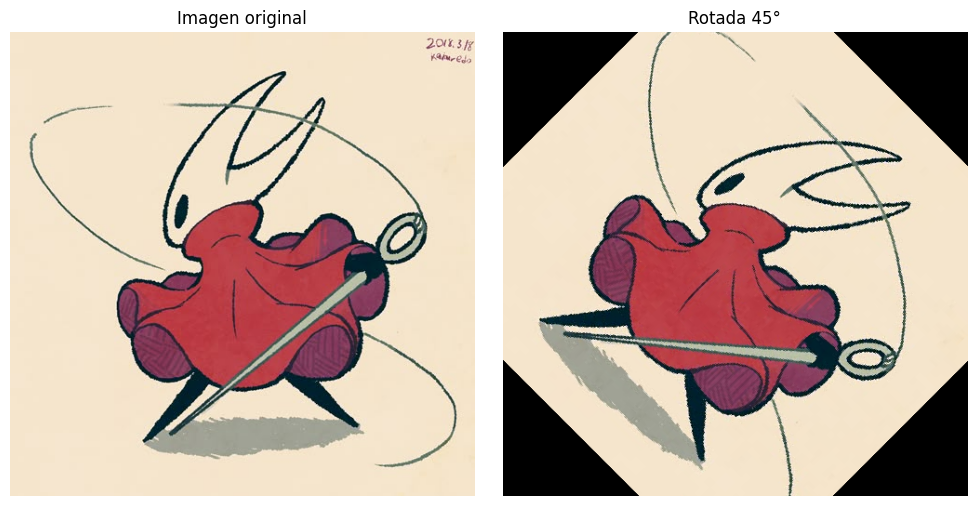

In [45]:
### Rotacion geometrica
def rotar_imagen(img, angulo):
    filas, cols, canales = img.shape
    xc, yc = cols / 2, filas / 2  # centro de la imagen
    ang = math.radians(angulo)   # convertir a radianes

    resultado = np.zeros_like(img)

    for y in range(filas):
        for x in range(cols):
            # Coordenadas relativas al centro
            x_rel = x - xc
            y_rel = y - yc

            # Aplicar rotación inversa para obtener el píxel original
            x_orig = x_rel * math.cos(-ang) - y_rel * math.sin(-ang) + xc
            y_orig = x_rel * math.sin(-ang) + y_rel * math.cos(-ang) + yc

            # Asignar el valor si está dentro de los límites
            if 0 <= int(y_orig) < filas and 0 <= int(x_orig) < cols:
                resultado[y, x] = img[int(y_orig), int(x_orig)]

    return resultado

rotada = rotar_imagen(hornet, 45)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(hornet)
axes[0].set_title("Imagen original")
axes[0].axis("off")

axes[1].imshow(rotada)
axes[1].set_title("Rotada 45°")
axes[1].axis("off")

plt.tight_layout()
plt.show()


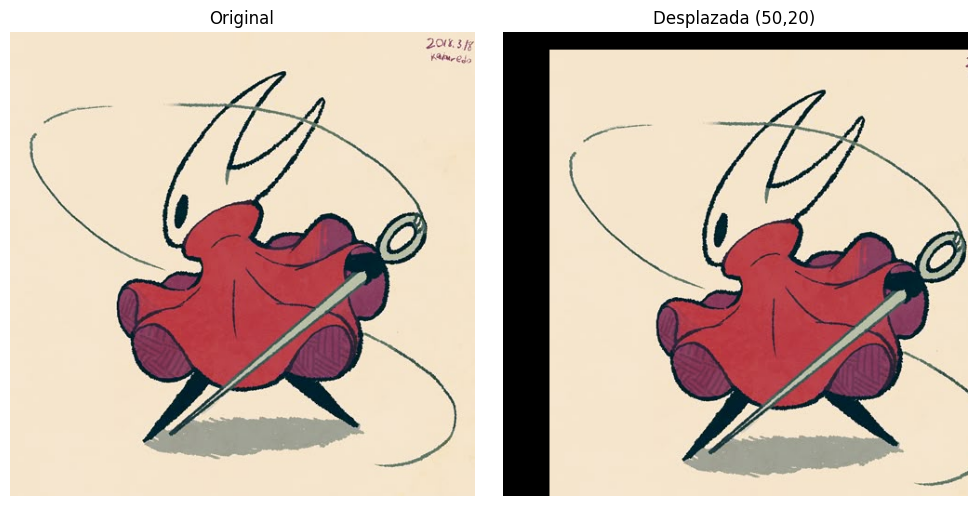

In [46]:

def desplazar_imagen(img, dx, dy):
    filas, cols, canales = img.shape
    resultado = np.zeros_like(img)

    for y in range(filas):
        for x in range(cols):
            nuevo_x = x + dx
            nuevo_y = y + dy

            if 0 <= nuevo_x < cols and 0 <= nuevo_y < filas:
                resultado[nuevo_y, nuevo_x] = img[y, x]

    return resultado

desplazada = desplazar_imagen(hornet, 50, 20)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(hornet)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(desplazada)
axes[1].set_title("Desplazada (50,20)")
axes[1].axis("off")

plt.tight_layout()
plt.show()
